In [59]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [60]:
# Load observations from the mnist dataset. The observations are divided into a training set and a test set
mnist_train = torchvision.datasets.MNIST('PATH_TO_STORE_TRAINSET', train=True, download=True)
x_train = mnist_train.data.reshape(-1, 784).float()  # Reshape input
y_train = torch.zeros((mnist_train.targets.shape[0], 10))  # Create output tensor
y_train[torch.arange(mnist_train.targets.shape[0]), mnist_train.targets] = 1  # Populate output

mnist_test = torchvision.datasets.MNIST('PATH_TO_STORE_TESTSET', train=False, download=True)
x_test = mnist_test.data.reshape(-1, 784).float()  # Reshape input
y_test = torch.zeros((mnist_test.targets.shape[0], 10))  # Create output tensor
y_test[torch.arange(mnist_test.targets.shape[0]), mnist_test.targets] = 1  # Populate output

In [63]:
class MNIST:
    def __init__(self):
        # Initializes with 784 rows of 10 ones
        self.W = torch.ones([784, 10], requires_grad=True)
        # Initializes with 1 row of 10 ones
        self.b = torch.ones([1, 10], requires_grad=True)

    # Predictor
    def f(self, x):
        # Have to set dim=1 as I got a warning. Implicit dim is deprecated
        return torch.nn.functional.softmax(x @ self.W + self.b, dim=1)

    # Cross Entropy loss
    def loss(self, x, y):
        return torch.nn.functional.binary_cross_entropy_with_logits(self.f(x), y)

    def accuracy(self, x, y):
        return torch.mean(torch.eq(self.f(x).argmax(1), y.argmax(1)).float())


model = MNIST()

In [64]:
learning_rate = 0.1
epoch = 15

optimizer = torch.optim.SGD([model.W, model.b], lr=learning_rate)
results = []
for index, epoch in enumerate(range(epoch)):
    if (index+1) % 1000 == 0:
        print(f'epoch = {index+1}, loss = {model.loss(x_train, y_train).item()}, accuracy = {model.accuracy(x_test, y_test).item() * 100}%')
        results.append([index+1, model.loss(x_train, y_train).item(),
                        model.accuracy(x_test, y_test).item() * 100])

    model.loss(x_train, y_train).backward()  # Compute loss gradients
    optimizer.step()  # Perform optimization by adjusting W and b
    optimizer.zero_grad()  # Clear gradients for next step

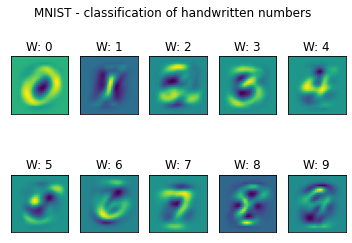

In [66]:
fig = plt.figure('Oppgave D')
fig.suptitle('MNIST - classification of handwritten numbers')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(model.W[:, i].detach().numpy().reshape(28, 28))
    plt.title(f'W: {i}')
    plt.xticks([])
    plt.yticks([])

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])


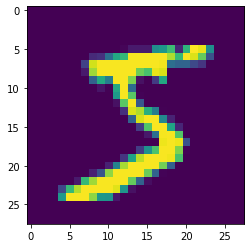

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


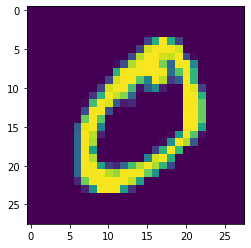

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


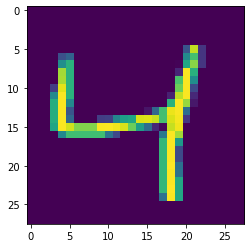

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])


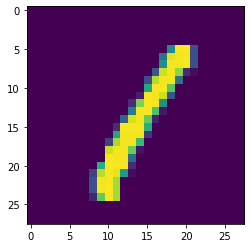

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])


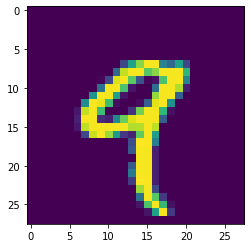

tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])


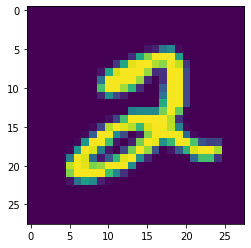

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])


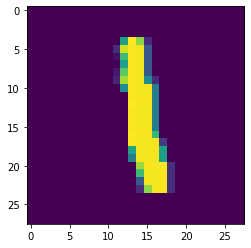

tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])


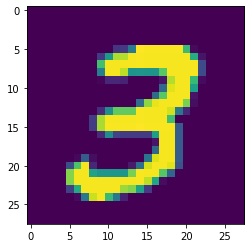

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])


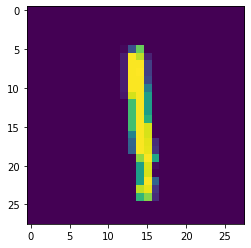

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])


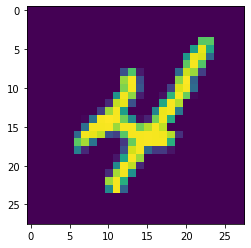

In [70]:
for i in range (10):
    plt.imshow(x_train[i, :].reshape(28, 28))
    print(y_train[i, :])
    plt.show()


